In [1]:
!git clone https://github.com/e4s2022/e4s.git

Cloning into 'e4s'...
remote: Enumerating objects: 305, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 305 (delta 27), reused 19 (delta 19), pack-reused 267
Receiving objects: 100% (305/305), 82.07 MiB | 23.42 MiB/s, done.
Resolving deltas: 100% (95/95), done.


In [2]:
# https://stackoverflow.com/questions/72824468/pip-installing-environment-yml-as-if-its-a-requirements-txt

import yaml
import os
from yaml.loader import SafeLoader


with open("/content/e4s/e4s_env.yaml") as file_handle:
    environment_data = yaml.load(file_handle, Loader=SafeLoader)

with open("/content/e4s/requirements.txt", "w") as file_handle:
    for dependency in environment_data["dependencies"]:
        if not isinstance(dependency, dict):
            package_name, package_version = dependency.split("=")[:2]
            file_handle.write("{} == {}".format(package_name, package_version))
            file_handle.write("\n")
        else:
            for pckg in dependency['pip']:
                package_name, package_version = pckg.split("==")[:2]
                file_handle.write("{} == {}".format(package_name, package_version))
                file_handle.write("\n")

In [3]:
with open("/content/e4s/requirements.txt") as file_handle:
    for line in file_handle:
        try:
            package_name, package_version = line.split("==")
            os.system("pip install {}=={}".format(package_name, package_version))
        except:
            print(line)
            pass

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!mkdir /content/e4s/pretrained_ckpts/gpen/weights
!mkdir /content/e4s/pretrained_ckpts/e4s

!cp /content/drive/MyDrive/Colab_Notebooks/CV/weights/* /content/e4s/pretrained_ckpts/gpen/weights
!cp /content/drive/MyDrive/Colab_Notebooks/CV/models_weights/00000189-checkpoint.pth.tar /content/e4s/pretrained_ckpts/facevid2vid
!cp /content/drive/MyDrive/Colab_Notebooks/CV/models_weights/iteration_300000.pt /content/e4s/pretrained_ckpts/e4s
!cp /content/drive/MyDrive/Colab_Notebooks/CV/models_weights/79999_iter.pth /content/e4s/pretrained_ckpts/face_parsing

In [6]:
%cd /content/e4s/

/content/e4s


In [7]:
!pip install -q directory_tree

In [8]:
# Sanity check (https://github.com/e4s2022/e4s/blob/main/INSTALLATION.md#2-sanity-check)
from directory_tree import display_tree

display_tree("/content/e4s/pretrained_ckpts")

pretrained_ckpts/
├── auxiliray/
│   └── model.pth
├── e4s/
│   └── iteration_300000.pt
├── face_parsing/
│   ├── 79999_iter.pth
│   ├── segnext.base.512x512.celebamaskhq.160k.py
│   ├── segnext.large.512x512.celebamaskhq.160k.py
│   ├── segnext.small.512x512.celebamaskhq.160k.py
│   └── segnext.tiny.512x512.celebamaskhq.160k.py
├── facevid2vid/
│   ├── 00000189-checkpoint.pth.tar
│   └── vox-256.yaml
├── gpen/
│   ├── fetch_gepn_models.sh
│   └── weights/
│       ├── GPEN-BFR-512.pth
│       ├── ParseNet-latest.pth
│       ├── realesrnet_x4.pth
│       └── RetinaFace-R50.pth
├── put_ckpts_accordingly.txt
└── shape_predictor_68_face_landmarks.dat


In [9]:
!pip install -q Ninja

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 5.7 MB/s eta 0:00:00


In [17]:
%cd /content/e4s/

/content/e4s


In [19]:
%run scripts/face_swap.py --source=/content/sui.jpg --target=/content/photo_5.jpg

Load face_vid2vid pre-trained model success!
Load GPEN pre-traiend model success!
Load pre-trained face parsing models success!
Load E4S pre-trained model success!


# All in one

In [20]:
import os
from tqdm import tqdm
os.listdir('/content/')

paintings = ['photo_1.jpg', 'photo_2.jpg', 'photo_3.jpg', 'photo_4.jpg', 'photo_5.jpg']
selfies = ['ein.jpg', 'jim.jpg', 'oliv.jpg', 'tom.jpg', 'will.jpg', 'sui.jpg']

dir_name = '/content/'
cmds = []
for paint in tqdm(paintings, desc='paintings', leave=False):
    for selfie in tqdm(selfies, desc='selfies', leave=False):
        path_selfie_name = os.path.join(dir_name, selfie)
        path_painting_name = os.path.join(dir_name, paint)

        s = f'%run scripts/face_swap.py --source={path_selfie_name} --target={path_painting_name}'
        cmds.append(s + '\n')

with open('script.sh', 'w') as file:
    file.writelines(cmds)


selfies:   0%|          | 0/6 [00:00<?, ?it/s]
                                              
selfies:   0%|          | 0/6 [00:00<?, ?it/s]
                                              
selfies:   0%|          | 0/6 [00:00<?, ?it/s]
                                              
selfies:   0%|          | 0/6 [00:00<?, ?it/s]
                                              
selfies:   0%|          | 0/6 [00:00<?, ?it/s]


In [ ]:
# !bash script.sh

# doesn't work

for some reasons I don't find better way as just copy and paste all lines (

In [59]:
%run scripts/face_swap.py --source=/content/ein.jpg --target=/content/photo_1.jpg
%run scripts/face_swap.py --source=/content/jim.jpg --target=/content/photo_1.jpg
%run scripts/face_swap.py --source=/content/oliv.jpg --target=/content/photo_1.jpg
%run scripts/face_swap.py --source=/content/tom.jpg --target=/content/photo_1.jpg
%run scripts/face_swap.py --source=/content/will.jpg --target=/content/photo_1.jpg
%run scripts/face_swap.py --source=/content/sui.jpg --target=/content/photo_1.jpg
%run scripts/face_swap.py --source=/content/ein.jpg --target=/content/photo_2.jpg
%run scripts/face_swap.py --source=/content/jim.jpg --target=/content/photo_2.jpg
%run scripts/face_swap.py --source=/content/oliv.jpg --target=/content/photo_2.jpg
%run scripts/face_swap.py --source=/content/tom.jpg --target=/content/photo_2.jpg
%run scripts/face_swap.py --source=/content/will.jpg --target=/content/photo_2.jpg
%run scripts/face_swap.py --source=/content/sui.jpg --target=/content/photo_2.jpg
%run scripts/face_swap.py --source=/content/ein.jpg --target=/content/photo_3.jpg
%run scripts/face_swap.py --source=/content/jim.jpg --target=/content/photo_3.jpg
%run scripts/face_swap.py --source=/content/oliv.jpg --target=/content/photo_3.jpg
%run scripts/face_swap.py --source=/content/tom.jpg --target=/content/photo_3.jpg
%run scripts/face_swap.py --source=/content/will.jpg --target=/content/photo_3.jpg
%run scripts/face_swap.py --source=/content/sui.jpg --target=/content/photo_3.jpg
%run scripts/face_swap.py --source=/content/ein.jpg --target=/content/photo_4.jpg
%run scripts/face_swap.py --source=/content/jim.jpg --target=/content/photo_4.jpg
%run scripts/face_swap.py --source=/content/oliv.jpg --target=/content/photo_4.jpg
%run scripts/face_swap.py --source=/content/tom.jpg --target=/content/photo_4.jpg
%run scripts/face_swap.py --source=/content/will.jpg --target=/content/photo_4.jpg
%run scripts/face_swap.py --source=/content/sui.jpg --target=/content/photo_4.jpg
%run scripts/face_swap.py --source=/content/ein.jpg --target=/content/photo_5.jpg
%run scripts/face_swap.py --source=/content/jim.jpg --target=/content/photo_5.jpg
%run scripts/face_swap.py --source=/content/oliv.jpg --target=/content/photo_5.jpg
%run scripts/face_swap.py --source=/content/tom.jpg --target=/content/photo_5.jpg
%run scripts/face_swap.py --source=/content/will.jpg --target=/content/photo_5.jpg
%run scripts/face_swap.py --source=/content/sui.jpg --target=/content/photo_5.jpg


Load face_vid2vid pre-trained model success!
Load GPEN pre-traiend model success!
Load pre-trained face parsing models success!
Load E4S pre-trained model success!
Load face_vid2vid pre-trained model success!
Load GPEN pre-traiend model success!
Load pre-trained face parsing models success!
Load E4S pre-trained model success!
Load face_vid2vid pre-trained model success!
Load GPEN pre-traiend model success!
Load pre-trained face parsing models success!
Load E4S pre-trained model success!
Load face_vid2vid pre-trained model success!
Load GPEN pre-traiend model success!
Load pre-trained face parsing models success!
Load E4S pre-trained model success!
Load face_vid2vid pre-trained model success!
Load GPEN pre-traiend model success!
Load pre-trained face parsing models success!
Load E4S pre-trained model success!
Load face_vid2vid pre-trained model success!
Load GPEN pre-traiend model success!
Load pre-trained face parsing models success!
Load E4S pre-trained model success!
Load face_vid2vi

In [60]:
# colab and deepfakes ...

d = 'f' + 'a' + 'c' + 'e' + 's' + 'w' + 'a' + 'p'

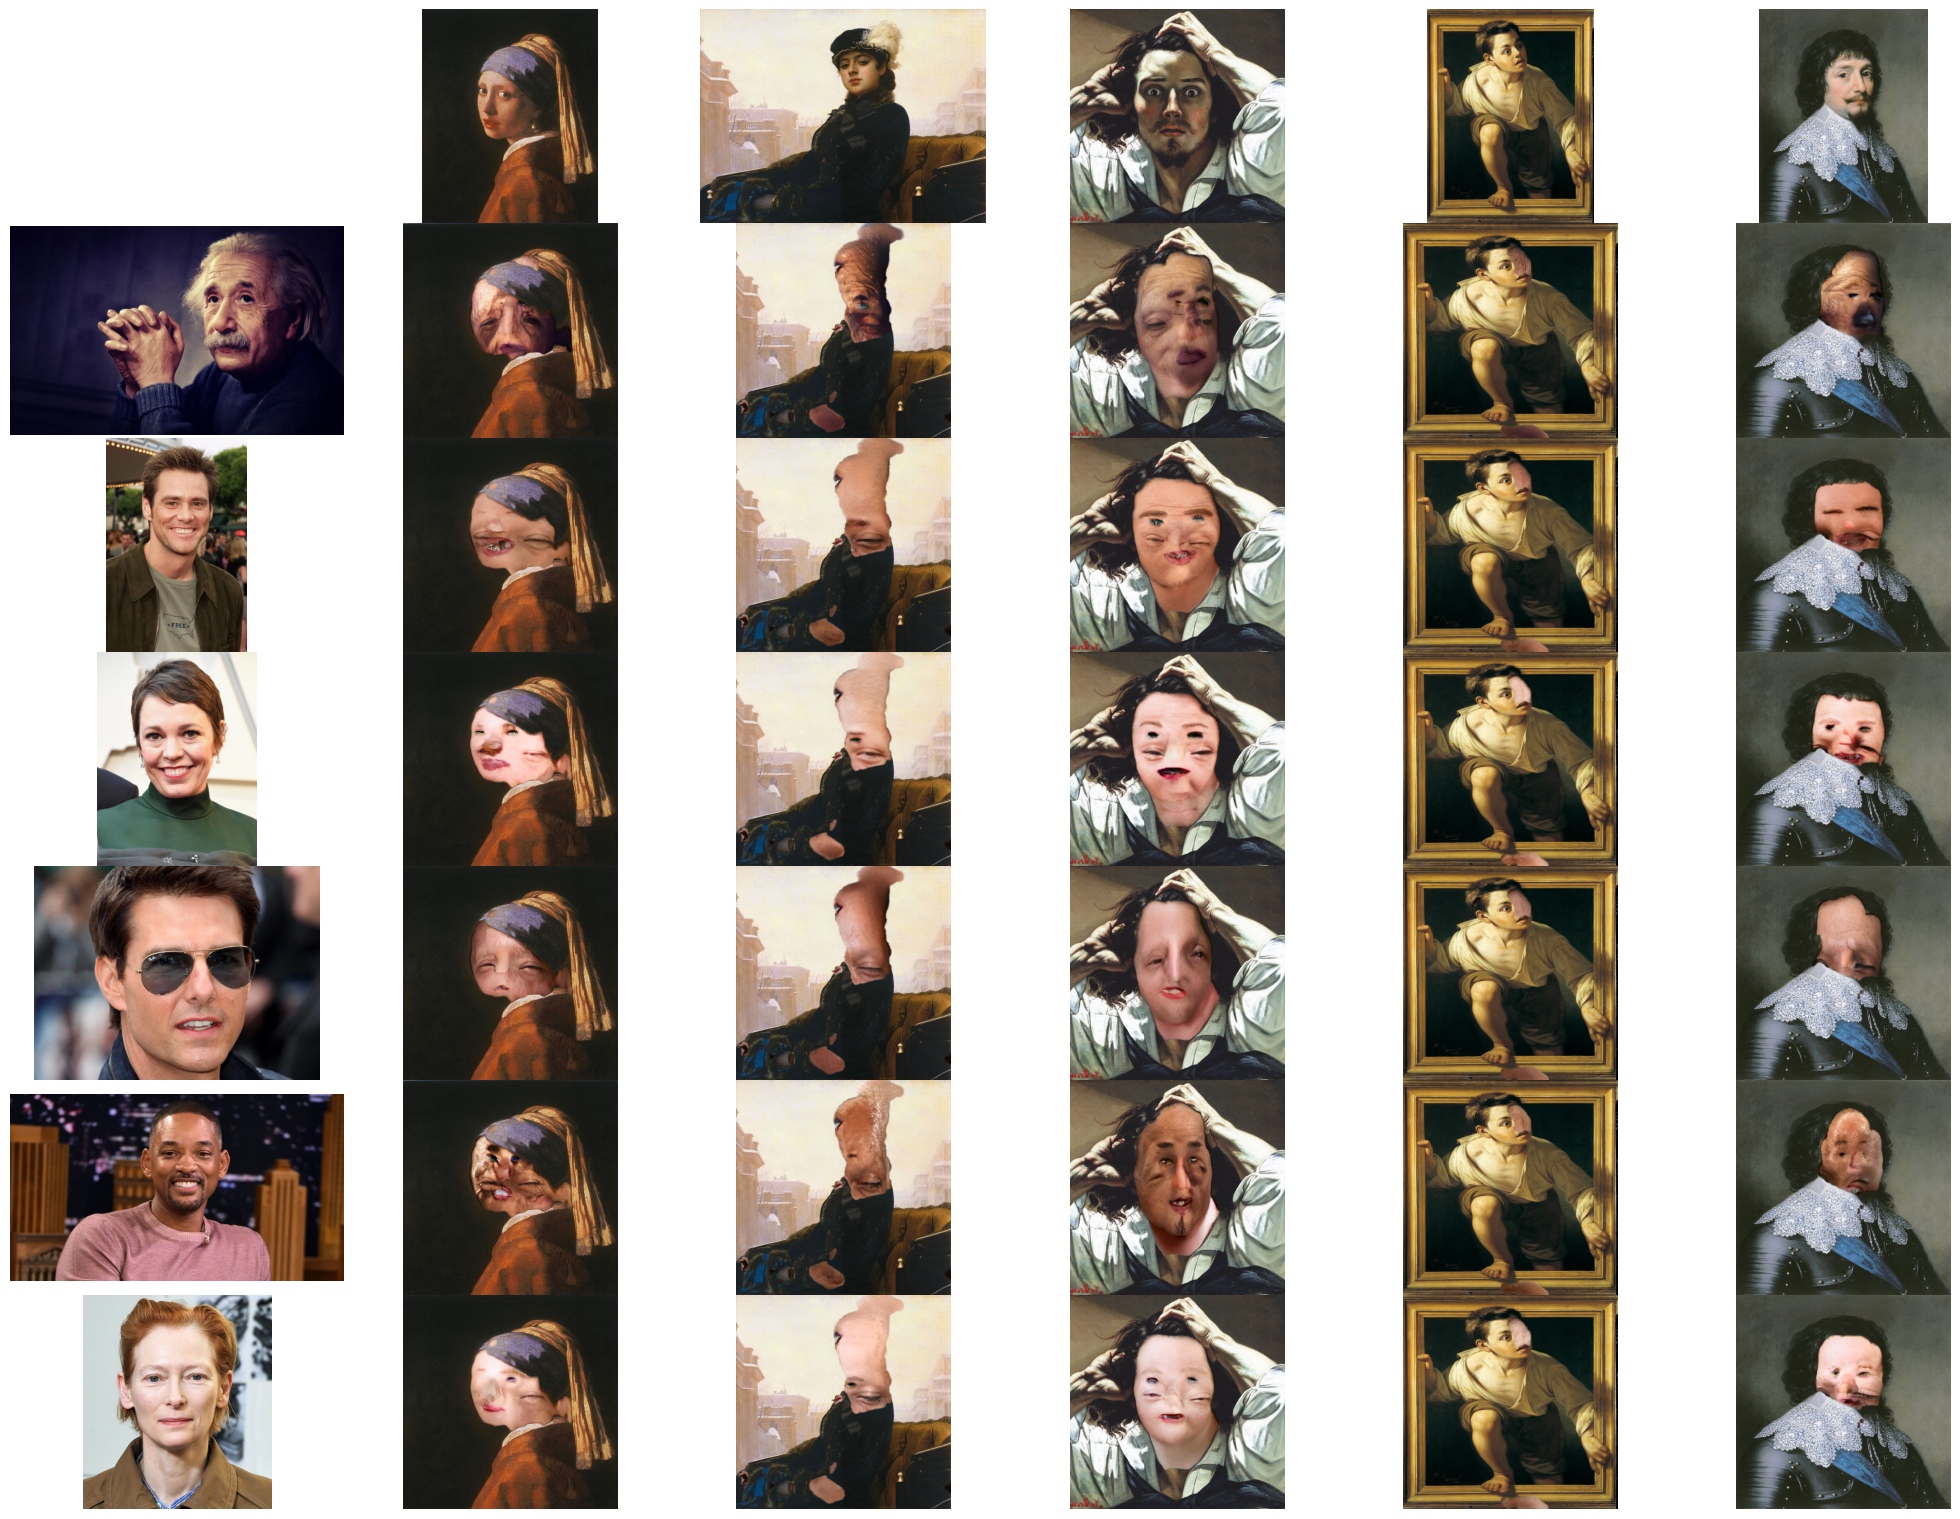

In [70]:
import matplotlib.pyplot as plt


paintings = ['photo_1.jpg', 'photo_2.jpg', 'photo_3.jpg', 'photo_4.jpg', 'photo_5.jpg']
selfies = ['ein.jpg', 'jim.jpg', 'oliv.jpg', 'tom.jpg', 'will.jpg', 'sui.jpg']

fig, axes = plt.subplots(len(selfies) + 1, len(paintings) + 1, figsize=(20, 15))

name2col = dict(zip(selfies, range(1, len(selfies) + 1)))
name2row = dict(zip(paintings, range(1, len(paintings) + 1)))

img_dir_path = f'/content/e4s/example/output/{d}/'

for img_name in ([''] + os.listdir(img_dir_path)):
    if img_name == '':  # only for examples
        axes[0, 0].axis('off')
        for i, painting in enumerate(paintings):
            axes[0, i + 1].axis('off')
            axes[0, i + 1].set_aspect('equal')
            axes[0, i + 1].imshow(plt.imread(os.path.join('/content/', painting)))

        for i, selfie in enumerate(selfies):
            axes[i + 1, 0].axis('off')
            axes[i + 1, 0].set_aspect('equal')
            axes[i + 1, 0].imshow(plt.imread(os.path.join('/content/', selfie)))

        continue

    elif img_name.endswith(('.jpg', '.png')):  # for generated images

        img_path = os.path.join(img_dir_path, img_name)

        col = name2col[f"{img_name.split('_')[1]}.jpg"]
        row = name2row[img_name.split('_to_')[1][:-4] + '.jpg']

        axes[col, row].axis('off')
        axes[col, row].set_aspect('equal')

        axes[col, row].imshow(plt.imread(img_path))

plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
